In [151]:
import numpy
%matplotlib nbagg
from matplotlib import pyplot
from tqdm import tnrange

In [152]:
import soapy
import aotools

In [153]:
CONFIGFILE = "conf/simulation/fittingerror.yaml"

In [154]:
N_SUBAPS = numpy.array([6, 8, 10, 16, 20, 30, 40])
N_ACTUATORS = numpy.array([7, 9, 11, 17, 21, 31, 41])
PUPIL_SIZES = numpy.array([100, 100, 100, 128, 200, 300, 400])
SVD_CONDITIONING = numpy.array([0.03, 0.03, 0.03, 0.01, 0.01, 0.005, 0.005])
RUNS = 1
TEL_DIAM = 8.
R0 = 0.20

In [155]:
strehls = numpy.zeros((RUNS, len(N_SUBAPS)))
wfe = numpy.zeros((RUNS, len(N_SUBAPS)))
for r in tnrange(RUNS):
    for n in range(len(N_SUBAPS)):
        print("\nSet WFS to {} subaps".format(N_SUBAPS[n]))
        sim = soapy.Sim(CONFIGFILE)
        sim.config.sim.pupilSize = PUPIL_SIZES[n]
        
        sim.config.wfss[0].nxSubaps = N_SUBAPS[n]
        sim.config.dms[0].nxActuators = N_ACTUATORS[n]
        sim.config.recon.svdConditioning = SVD_CONDITIONING[n]
        
        sim.aoinit()
        sim.makeIMat(forceNew=True)
        sim.aoloop()

        strehls[r, n] = sim.longStrehl[0][-1]
        wfe[r, n] = sim.WFE[0][-1]




Set WFS to 6 subaps
Pixel Scale: 12.50 pxls/m
subScreenSize: 102 simulation pixels
1 of 1: Loaded configuration file successfully!Starting Sim: 2017-04-06-20-18-37
Pixel Scale: 12.50 pxls/m
subScreenSize: 102 simulation pixels
Creating mask...
Turbulence summary @ 500 nm:
| r0 = 0.20 m (0.52" seeing)
| Vbar_5/3 = 5.00 m/s
| tau0 = 12.56 ms
Initialise Infinite Phase Screen 1
Initialising WFSs....
shackhartmannfast.py -> initFFTs: requested WFS FFT Padding less than FOV size... Setting oversampling to: 4
Generating fftw3 plan....
If this takes too long, change fftw_FLAGS.
Done!
WFS 0: 64 measurements
Initialising 1 DMs...
Making DM Influence Functions...
DM 0: 49 active actuators
49 total DM Actuators
Initialising Reconstructor...
Initialising 1 Science Cams...
Generating fftw3 plan....
If this takes too long, change fftw_FLAGS.
Done!
Initialise Data Storage...
Initialisation Complete!
Making interaction Matrices...
Creating Interaction Matrix beteen DM 0 
48 of 49: Generating 49 Actuat

KeyboardInterrupt: 

In [167]:
SUBAP_DIAM = TEL_DIAM / N_SUBAPS
print(SUBAP_DIAM)
theoretical_wfe = numpy.sqrt(0.35 * ((TEL_DIAM/N_SUBAPS)/R0) ** (5./3))

[ 1.33333333  1.          0.8         0.5         0.4         0.26666667
  0.2       ]


In [168]:
theoretical_strehl = numpy.exp(-(theoretical_wfe**2))
theoretical_wfe *= (1650/(2*numpy.pi))

<IPython.core.display.Javascript object>


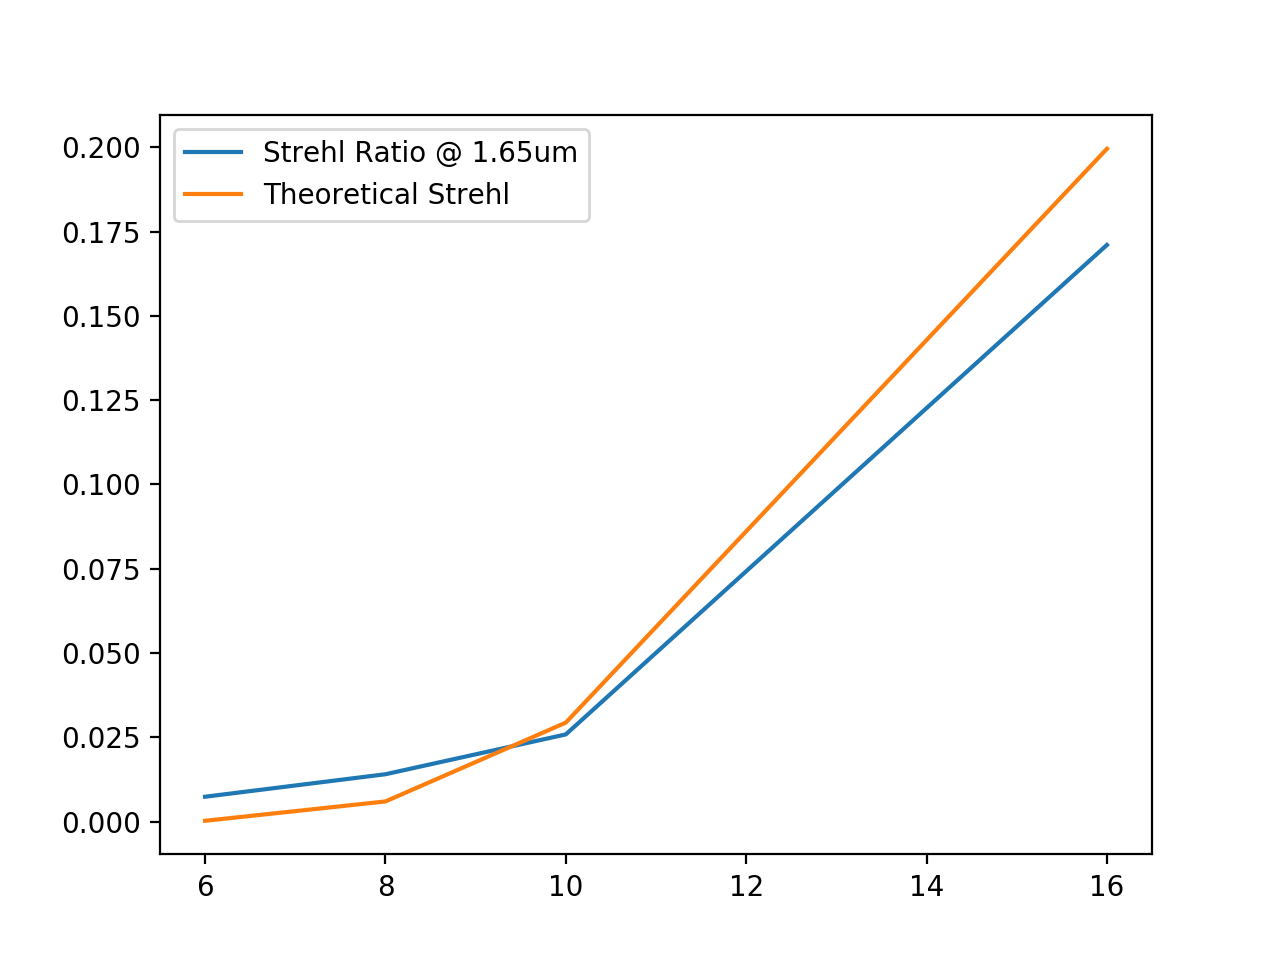

In [169]:
fig = pyplot.figure()
pyplot.plot(N_SUBAPS[:n-1], strehls.T[:n-1], label="Strehl Ratio @ 1.65um")
pyplot.plot(N_SUBAPS[:n-1], theoretical_strehl[:n-1], label="Theoretical Strehl")
# pyplot.plot(N_SUBAPS, wfe.T, label="Wavefront Error")
pyplot.legend()

In [170]:
measured_wfe = numpy.sqrt(-1 * numpy.log(strehls[:,:n-1])) * (1650 / (2*numpy.pi))
print(measured_wfe)

[[ 581.70265574  542.27144355  502.01775669  348.97719574]]


<IPython.core.display.Javascript object>


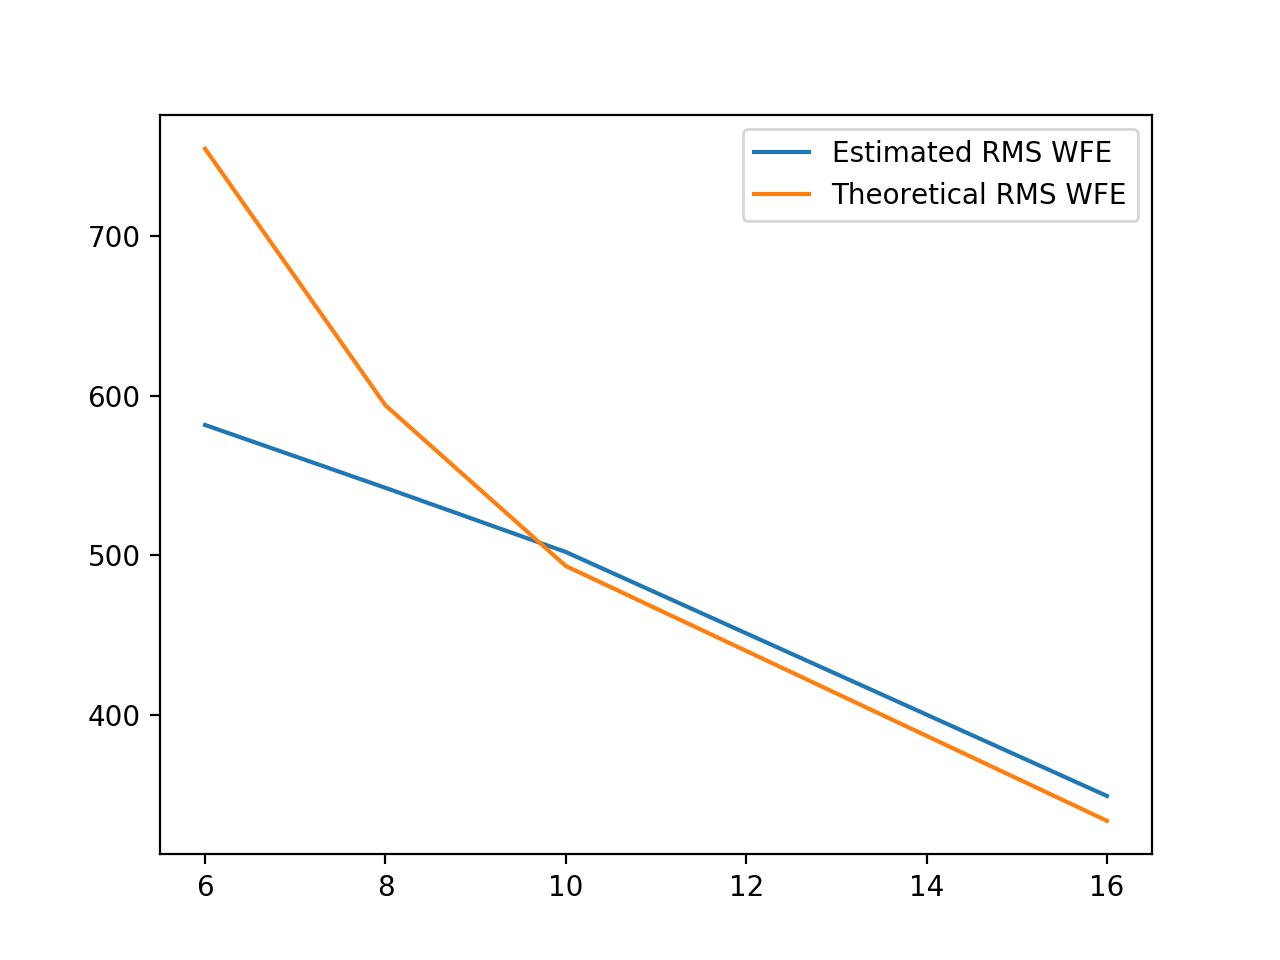

In [171]:
fig = pyplot.figure()
pyplot.plot(N_SUBAPS[:n-1], measured_wfe.T[:n-1], label="Estimated RMS WFE")
pyplot.plot(N_SUBAPS[:n-1], theoretical_wfe[:n-1], label="Theoretical RMS WFE")
# pyplot.plot(N_SUBAPS, wfe.T, label="Wavefront Error")
pyplot.legend()

<IPython.core.display.Javascript object>


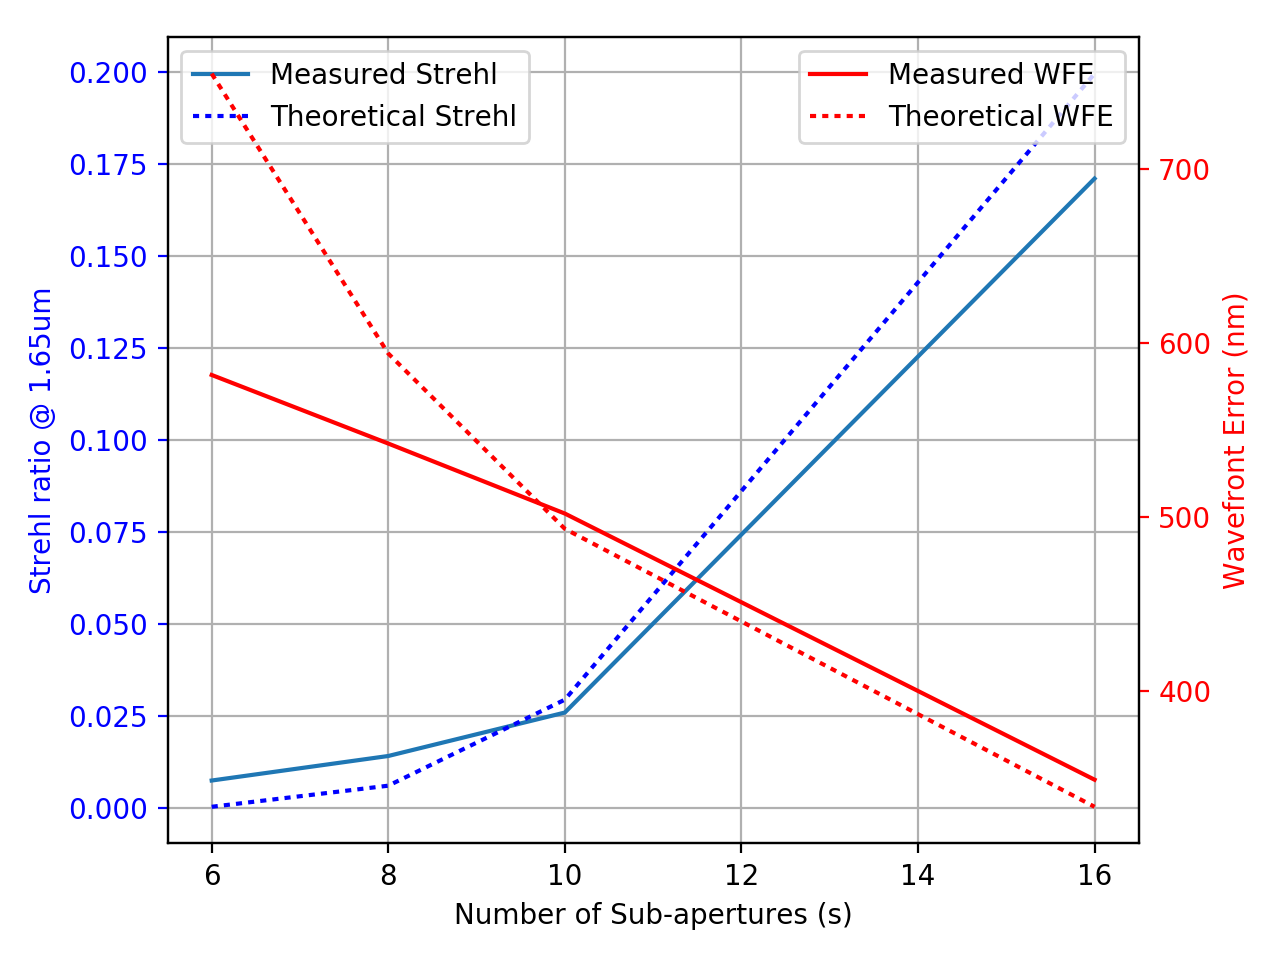

In [172]:
fig, ax1 = pyplot.subplots()
pyplot.grid()

ax1.plot(N_SUBAPS[:n-1], strehls.T[:n-1], label="Measured Strehl")
ax1.plot(N_SUBAPS[:n-1], theoretical_strehl.T[:n-1], label="Theoretical Strehl", color="b", linestyle=":")

ax1.set_xlabel('Number of Sub-apertures (s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Strehl ratio @ 1.65um', color='b')
ax1.tick_params('y', colors='b')
pyplot.legend(loc=0)

ax2 = ax1.twinx()
ax2.plot(N_SUBAPS[:n-1], measured_wfe.T[:n-1], color="r", label="Measured WFE")
ax2.plot(N_SUBAPS[:n-1], theoretical_wfe[:n-1], color="r", linestyle=":", label="Theoretical WFE")
ax2.set_ylabel('Wavefront Error (nm)', color='r')
ax2.tick_params('y', colors='r')
pyplot.legend()


fig.tight_layout()